In [1]:
import pandas as pd
import numpy as np
import wrds
import seaborn as sns
import matplotlib.pyplot as plt

# Imports

In [53]:
# file imports
file_path_forecasts = '../data/dataset2014-2022-v4.zip'

# IBES forecasts
df_forecasts = pd.read_csv(file_path_forecasts)

In [3]:
df_forecasts

,TICKER,CUSIP,OFTIC,CNAME,ESTIMATOR,ANALYS,FPI,MEASURE,VALUE,FPEDATS,REVDATS,ANNDATS,ACTUAL,ANNDATS_ACT
0,0000,87482X10,TLMR,TALMER BANCORP,2500,72481,1,EPS,1.200,2014-12-31,2014-12-03,2014-12-03,1.21,2015-01-30
1,0000,87482X10,TLMR,TALMER BANCORP,2500,72481,1,EPS,0.850,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26
2,0000,87482X10,TLMR,TALMER BANCORP,149,119962,1,EPS,0.860,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26
3,0000,87482X10,TLMR,TALMER BANCORP,1267,71182,1,EPS,0.890,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26
4,0000,87482X10,TLMR,TALMER BANCORP,149,119962,1,EPS,0.890,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570994,ZYNX,98986M10,ZYXI,ZYNEX INC,2709,122730,1,EPS,0.460,2022-12-31,2022-07-29,2022-07-29,0.44,2023-03-13
1570995,ZYNX,98986M10,ZYXI,ZYNEX INC,926,118308,1,EPS,0.420,2022-12-31,2023-01-18,2022-07-29,0.44,2023-03-13
1570996,ZYNX,98986M10,ZYXI,ZYNEX,220,193620,1,EPS,0.423,2022-12-31,2023-01-06,2022-10-27,0.44,2023-03-13
1570997,ZYNX,98986M10,ZYXI,ZYNEX,2709,122730,1,EPS,0.440,2022-12-31,2022-10-28,2022-10-28,0.44,2023-03-13


In [178]:
# setup WRDS database connection for linking table
db = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [4]:
db.list_libraries()

['aha_sample',
 'ahasamp',
 'auditsmp',
 'auditsmp_all',
 'bank',
 'bank_all',
 'block',
 'block_all',
 'boardex_trial',
 'boardsmp',
 'bvd',
 'bvd_ama_large',
 'bvd_ama_medium',
 'bvd_ama_small',
 'bvd_ama_verylarge',
 'bvd_amadeus_trial',
 'bvd_bvdbankf_trial',
 'bvd_orbis_large',
 'bvd_orbis_medium',
 'bvd_orbis_small',
 'bvd_orbis_trial',
 'bvdsamp',
 'calcbench_trial',
 'calcbnch',
 'cboe',
 'cboe_all',
 'cboe_sample',
 'cboesamp',
 'ciq',
 'ciq_common',
 'ciq_ratings',
 'ciqsamp',
 'ciqsamp_capstrct',
 'ciqsamp_common',
 'ciqsamp_keydev',
 'ciqsamp_pplintel',
 'ciqsamp_ratings',
 'ciqsamp_transactions',
 'ciqsamp_transcripts',
 'cisdmsmp',
 'columnar',
 'comp',
 'comp_bank',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global',
 'comp_global_daily',
 'comp_na_annual_all',
 'comp_na_daily_all',
 'comp_na_monthly_all',
 'comp_segments_hist',
 'comp_segments_hist_daily',
 'comp_snapshot',
 'compa',
 'compb',
 'compg',
 'compm',
 'compsamp',
 'compsamp_all',
 'compsamp_snapshot',
 '

In [5]:
crsp_link = db.get_table(library= "wrdsapps_link_crsp_ibes", table = "ibcrsphist")
crsp_link.head()

,ticker,permno,ncusip,sdate,edate,score
0,0000,14471.0,87482X10,2014-02-20,2016-08-31,1.0
1,0001,14392.0,26878510,2014-02-20,2019-05-22,1.0
2,0001,NaN,None,2019-06-20,2023-12-31,6.0
3,0004,14418.0,02504D10,2014-02-20,2018-08-24,1.0
4,000R,14378.0,14163310,2014-02-20,2020-02-10,1.0


In [6]:
file_path_crsp_compustat = '../data/crsp-compustat-link.csv'

# IBES forecasts
link_table1 = pd.read_csv(file_path_crsp_compustat)

In [7]:
link_table1.head()

,gvkey,conm,tic,cusip,sic,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT
0,1000,A & E PLASTIK PAK INC,AE.2,000032102,3089,P,01,LU,25881,23369,1970-11-13,1978-06-30
1,1001,A & M FOOD SERVICES INC,AMFD.,000165100,5812,P,01,LU,10015,6398,1983-09-20,1986-07-31
2,1002,AAI CORP,AAIC.1,000352104,3825,C,01,LC,10023,22159,1972-12-14,1973-06-05
3,1003,A.A. IMPORTING CO INC,ANTQ,000354100,5712,C,01,LU,10031,6672,1983-12-07,1989-08-16
4,1004,AAR CORP,AIR,000361105,5080,P,01,LU,54594,20000,1972-04-24,E


In [8]:
link_table1.shape

(31952, 12)

# Preprocessing
df_forecasts:
- Lower case all columns in df_forecasts
- Drop unncessary columns
- Include only forecasts issued no earlier than 1 year ahead and no later than 30 days before fiscal year end
- Rename columns
- Delete rows with actual_eps = NAN or estimated_eps = NAN
- (Exclude forecasts for companies which only one analyst provides a forecast)
- Exclude all analysts appearing in the initial 2-3 years of the dataset (migitating problem of experience)
- (Retain the last forecast an analyst issues in a particular year)
- ...

In [54]:
df_forecasts = df_forecasts.rename(columns={col: col.lower() for col in df_forecasts.columns})

# Drop unncessary columns
columns_to_drop = ["fpi","measure","cusip"]
df_forecasts = df_forecasts.drop(columns=columns_to_drop)

In [59]:
# convert columns with dates to datetime
def convert_to_datetime(df):
    columns_to_convert = ['fpedats','revdats', "anndats", 'anndats_act']
    for column in columns_to_convert:
        df[column] = pd.to_datetime(df[column])
    return df
df_forecasts = convert_to_datetime(df_forecasts)

# filter forecasts  based on time
df_forecasts['forecast_horizon'] = df_forecasts['fpedats'] - df_forecasts['anndats']
df_forecasts = df_forecasts[(df_forecasts['forecast_horizon']> pd.Timedelta(days=30))&(df_forecasts['forecast_horizon']<pd.Timedelta(days=365))]

# calculate the mean forecast horizon of analyst i's forecasts for company j in fiscal period t and append to df

df_forecasts['mean_forecast_horizon_days'] = df_forecasts.groupby(['analys','ticker','fpedats'])['forecast_horizon'].transform('mean')
df_forecasts['mean_forecast_horizon_days'] = df_forecasts['mean_forecast_horizon'].dt.days
df_forecasts.head()

,ticker,oftic,cname,estimator,analys,value,fpedats,revdats,anndats,actual,anndats_act,forecast_horizon,mean_forecast_horizon,mean_forecast_horizon_days
1,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,173 days 09:36:00,173
2,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,186 days 20:34:17.142857142,186
3,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,181 days 00:00:00,181
4,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,186 days 20:34:17.142857142,186
5,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,171 days 16:00:00,171


In [57]:
# test
analyst_id = 113333
subset_analyst_i = df_forecasts[(df_forecasts['ticker'] == "AAPL") & (df_forecasts['fpedats'].dt.year == 2020) & (df_forecasts['analys'] == analyst_id)]
subset_analyst_i

,ticker,oftic,cname,estimator,analys,value,fpedats,revdats,anndats,actual,anndats_act,forecast_horizon,mean_forecast_horizon
105161,AAPL,AAPL,APPLE,171,113333,3.2565,2020-09-30,2020-01-22,2019-10-30,3.28,2020-10-29,336 days,291
105216,AAPL,AAPL,APPLE,171,113333,3.3510,2020-09-30,2020-01-28,2020-01-28,3.28,2020-10-29,246 days,291


rename columns to natural language

In [60]:
# rename columns
df_forecasts = df_forecasts.rename(columns={"ticker": "ibes_ticker_pk", "oftic": "official_ticker", "cname": "company_name",
                                            "analys": "analyst", "value": "estimated_eps", "fpedats": "fiscal_period_ending", 
                                            "revdats": "revision_date", "anndats": "announce_date", "actual": "actual_eps", "anndats_act": "announce_date_actual",
                                            "difference_date": "forecast_horizon"})

In [12]:
df_forecasts.head()

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon
1,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days
2,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days
3,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days
4,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days
5,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days


remove empty rows:

In [33]:
# drop all rows where the actual_eps is NaN and report number of rows dropped
print("Number of rows dropped: ", df_forecasts['actual_eps'].isna().sum())
df_forecasts = df_forecasts.dropna(subset=['actual_eps'])

Number of rows dropped:  39738


In [34]:
# drop all rows where the estimated_eps is NaN and report number of rows dropped
print("Number of rows dropped: ", df_forecasts['estimated_eps'].isna().sum())
df_forecasts = df_forecasts.dropna(subset=['estimated_eps'])

Number of rows dropped:  11


# Accuracies

## Variant 1: PMAFE 
PMAFE is the proportional mean absolute forecast error

$$PMAFE = \frac{DAFE_{ijt}}{\overline{AFE_{jt}}} = \frac{AFE_{ijt} - \overline{AFE_{jt}}}{\overline{AFE_{jt}}} $$

where 
- $AFE_{ijt}$ is the absolute forecast error for analyst i's forecast of firm j for year t, and 
- $\overline{AFE_{jt}}$ is the mean absolute forecast error for firm j for year t

Negative PMAFE: better than average performance of analyst i (capped at -1.0)

Postive PMAFE: worse than average performance (theoretically towards infinity)

Source: Analyst forecast accuracy:
Do ability, resources, and
portfolio complexity matter?q
Michael B. Clement

In [15]:
df_forecasts.head()

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon
1,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days
2,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days
3,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days
4,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days
5,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days


In [37]:
def calculate_pmafe(df):
    """
    This function first calculates the absolute forecast error for each analyst i forecast of firm j in year t
    If analyst i has multiple forecasts for firm j in year t, the function calculates the average forecast error
    In the second step an extra column is calculated for the overall forecast error is calculate for each firm j in year t
    In the third step, the function calculates the PMAFE for each analyst i forecast of firm j in year t
    This function adds new columns to the dataframe:
    - afe_analyst_i: the absolute forecast error for each analyst i forecast of firm j in year t
    - afe_analyst_i_mean: the average absolute forecast error for each analyst i forecast of firm j in year t
    - afe_firm_j_mean: the overall forecast error for each firm j in year t
    - pmafe: the PMAFE for each analyst i forecast of firm j in year t
    """
    # Step 1: Calculate the average absolute forecast error for each analyst i forecast of firm j in year t
    df['afe_analyst_i'] = np.abs(df['estimated_eps'] - df['actual_eps'])
    
    df_grouped = df.groupby(['ibes_ticker_pk', 'analyst', 'fiscal_period_ending']).agg({'afe_analyst_i': 'mean'}).reset_index()
    df_grouped = df_grouped.rename(columns={'afe_analyst_i': 'afe_analyst_i_mean'})
    df = pd.merge(df, df_grouped, on=['ibes_ticker_pk', 'analyst', 'fiscal_period_ending'], how='left')
    
    # Step 2: Calculate the overall forecast error for each firm j in year t
    df['afe_firm_j_mean'] = df.groupby(["ibes_ticker_pk", "fiscal_period_ending"])["afe_analyst_i"].transform("mean")
    
    # Step 3: Calculate the PMAFE for each analyst i forecast of firm j in year t
    df['pmafe'] = (df['afe_analyst_i_mean'] - df['afe_firm_j_mean']) / df['afe_firm_j_mean']
    
    return df

In [38]:
df_forecasts = calculate_pmafe(df_forecasts)
df_forecasts.head()

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,afe_analyst_i,afe_analyst_i_mean,afe_firm_j_mean,pmafe
0,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.17,0.198000,0.166786,0.187152
1,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.16,0.174286,0.166786,0.044968
2,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,0.13,0.158000,0.166786,-0.052677
3,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,0.13,0.174286,0.166786,0.044968
4,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,0.11,0.136667,0.166786,-0.180585


### Descriptive Analysis PMAFE

In [39]:
# descriptive statistics of PMAFE grouped by analyst    
pmafe_by_analyst = df_forecasts.groupby("analyst")["pmafe"].describe()
pmafe_by_analyst

,count,mean,std,min,25%,50%,75%,max
analyst,,,,,,,,
0,7870.0,-0.005910,0.458852,-1.000000,-0.247829,-0.032707,0.144621,6.709530
29,112.0,0.107223,0.547222,-0.817325,-0.257953,-0.071644,0.384967,1.347300
70,336.0,-0.126401,0.297749,-1.000000,-0.285714,-0.108339,0.023877,1.152564
74,73.0,-0.177377,0.550555,-0.830599,-0.666478,-0.169340,0.155608,1.110092
109,81.0,-0.121837,0.564089,-0.866581,-0.741244,-0.018652,0.295866,1.532706
...,...,...,...,...,...,...,...,...
199400,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
199402,6.0,-0.693086,0.263966,-0.960566,-0.911997,-0.735348,-0.447209,-0.405215
199407,1.0,-0.730223,NaN,-0.730223,-0.730223,-0.730223,-0.730223,-0.730223


In [20]:
# Whats the lowest and highest PMAFE?
print("The lowest PMAFE is: ", df_forecasts['pmafe'].min())
print("The highest PMAFE is: ", df_forecasts['pmafe'].max())

The lowest PMAFE is:  -1.0
The highest PMAFE is:  67.00421113621117


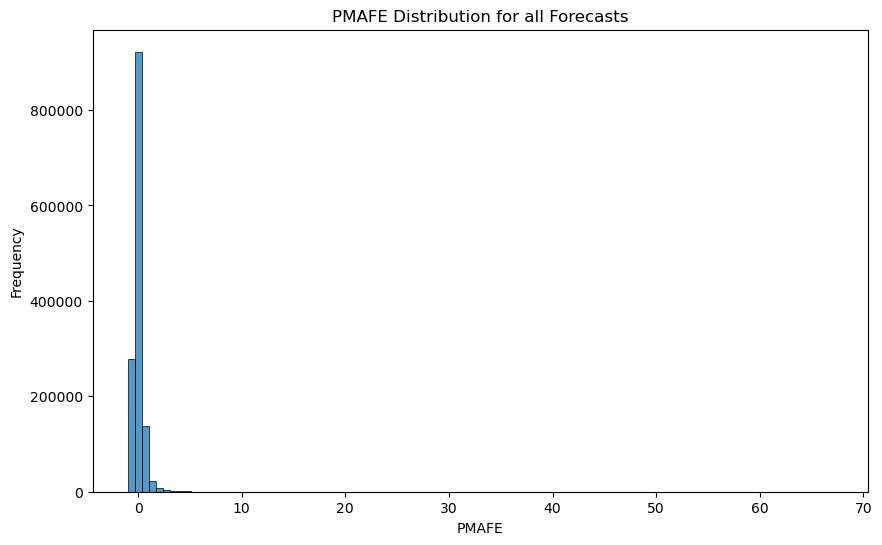

In [21]:
# most frequent PMAFE vales for all forecasts
plt.figure(figsize=(10, 6))
sns.histplot(df_forecasts['pmafe'], kde=False, bins=100)
plt.title("PMAFE Distribution for all Forecasts")
plt.xlabel("PMAFE")
plt.ylabel("Frequency")
plt.show()


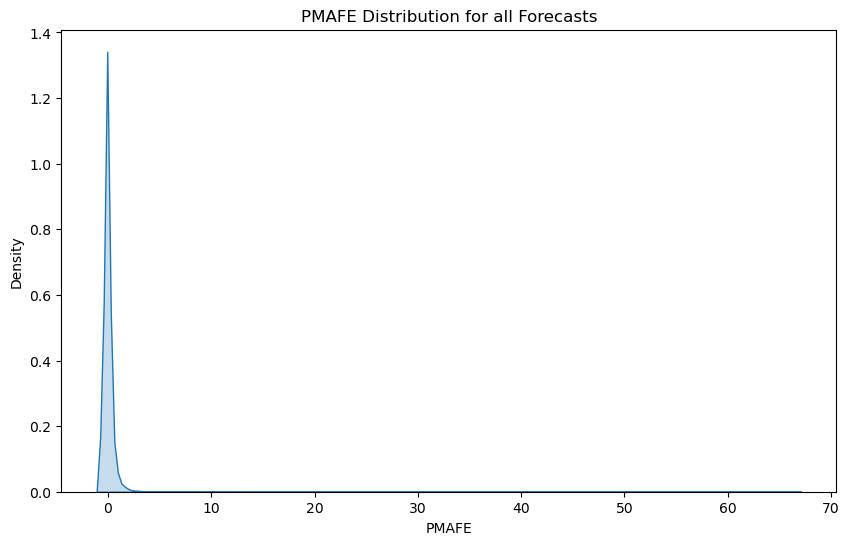

In [22]:
# density plot of PMAFE for all forecasts
plt.figure(figsize=(10, 6))
sns.kdeplot(df_forecasts['pmafe'], fill=True)
plt.title("PMAFE Distribution for all Forecasts")
plt.xlabel("PMAFE")
plt.ylabel("Density")
plt.show()

In [23]:
df_forecasts.head()

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,afe_analyst_i,afe_analyst_i_avg,afe_mean_firm_j,pmafe
0,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.17,0.198000,0.166786,0.187152
1,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.16,0.174286,0.166786,0.044968
2,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,0.13,0.158000,0.166786,-0.052677
3,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,0.13,0.174286,0.166786,0.044968
4,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,0.11,0.136667,0.166786,-0.180585


Decision for collapsing:
- If analyst i issued several forecasts within a fiscal period, `afe_analyst_i_mean` , `afe_firm_j_mean` and `pmafe` represent the averaged errors over all revisions

# Collapse df

in the final df, one row should correspond to one analyst i's mean forecast of firm j in fiscal year t with accuracy measure pmafe

columns:
 - ibes_ticker_pk
 - company_name
 - gvkey
 - fiscal_period_ending
 - analyst
 - estimator
 - estimated_eps
 - mean_forecast_horizon
 - actual_eps
 - announce_date_actual
 - pmafe
 - afe_analyst_i_mean
 - afe_firm_j_mean
 - feature x
 - ...

In [ ]:
def collapse_processed_df(df):
    """_summary_
    This function collapses/groups the input df into the final df so that one row should correspond to one analyst 
    i's forecast of firm j in fiscal year t with accuracy measure pmafe and other relevant features
    """
    

    return df


# Export df

In [40]:
import os 
new_folder_path = '../data/processed' 

# Check if the new folder exists, if not, create it
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Define the file path where you want to save the dataframe
file_path = os.path.join(new_folder_path, 'forecasts_pmafe.csv')
df_forecasts.to_csv(file_path)

In [127]:
df_forecasts

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,afe_analyst_i,afe_analyst_i_avg,afe_mean_firm_j,pmafe
0,0000,TLMR,TALMER BANCORP,2500,72481,0.850,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.170,0.198000,0.166786,0.187152
1,0000,TLMR,TALMER BANCORP,149,119962,0.860,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.160,0.174286,0.166786,0.044968
2,0000,TLMR,TALMER BANCORP,1267,71182,0.890,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,0.130,0.158000,0.166786,-0.052677
3,0000,TLMR,TALMER BANCORP,149,119962,0.890,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,0.130,0.174286,0.166786,0.044968
4,0000,TLMR,TALMER BANCORP,873,79092,0.910,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,0.110,0.136667,0.166786,-0.180585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375246,ZYNX,ZYXI,ZYNEX INC,2709,122730,0.460,2022-12-31,2022-07-29,2022-07-29,0.44,2023-03-13,155 days,0.020,0.054000,0.035867,0.505576
1375247,ZYNX,ZYXI,ZYNEX INC,926,118308,0.420,2022-12-31,2023-01-18,2022-07-29,0.44,2023-03-13,155 days,0.020,0.033333,0.035867,-0.070632
1375248,ZYNX,ZYXI,ZYNEX,220,193620,0.423,2022-12-31,2023-01-06,2022-10-27,0.44,2023-03-13,65 days,0.017,0.023500,0.035867,-0.344796
1375249,ZYNX,ZYXI,ZYNEX,2709,122730,0.440,2022-12-31,2022-10-28,2022-10-28,0.44,2023-03-13,64 days,0.000,0.054000,0.035867,0.505576


In [126]:
# import companies' data with merged sic
merged_df_sic

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,gvkey,iid,ibtic,sic
0,0000,TLMR,TALMER BANCORP,2500,72481,0.850,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,192458,01,0000,60.0
1,0000,TLMR,TALMER BANCORP,149,119962,0.860,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,192458,01,0000,60.0
2,0000,TLMR,TALMER BANCORP,1267,71182,0.890,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,192458,01,0000,60.0
3,0000,TLMR,TALMER BANCORP,149,119962,0.890,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,192458,01,0000,60.0
4,0000,TLMR,TALMER BANCORP,873,79092,0.910,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,192458,01,0000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376485,ZYNX,ZYXI,ZYNEX INC,2709,122730,0.460,2022-12-31,2022-07-29,2022-07-29,0.44,2023-03-13,155 days,129441,01,ZYNX,38.0
1376486,ZYNX,ZYXI,ZYNEX INC,926,118308,0.420,2022-12-31,2023-01-18,2022-07-29,0.44,2023-03-13,155 days,129441,01,ZYNX,38.0
1376487,ZYNX,ZYXI,ZYNEX,220,193620,0.423,2022-12-31,2023-01-06,2022-10-27,0.44,2023-03-13,65 days,129441,01,ZYNX,38.0
1376488,ZYNX,ZYXI,ZYNEX,2709,122730,0.440,2022-12-31,2022-10-28,2022-10-28,0.44,2023-03-13,64 days,129441,01,ZYNX,38.0
